# Sprint 8 – Project

This project aims to help the Y.Afisha marketing team optimize its investments. We will analyze visit, purchase, and advertising spend data to understand user behavior, financial returns, and suggest data-driven strategies.


## Step 1: Load the data and prepare it for analysis

### 1.0. Import and read the data

In [27]:
import pandas as pd
from pathlib import Path

# --- File Paths (flexible for both local and GitHub runs) ---

# Try local absolute path first (for Marcela's environment)
local_path = Path(r"C:\Users\marce\Documents\GitHub\Project-8-Tripleten\data\samples")

# Fallback to relative path (for GitHub)
repo_path = Path.cwd().parents[1] if (Path.cwd().name == "notebooks") else Path.cwd()
data_path = local_path if local_path.exists() else repo_path / "data" / "samples"

visits_path = data_path / "visits_log_us.csv"
orders_path = data_path / "orders_log_us.csv"
costs_path  = data_path / "costs_us.csv"

# --- Load datasets ---
visits = pd.read_csv(visits_path)
orders = pd.read_csv(orders_path)
costs  = pd.read_csv(costs_path)

# --- Preview ---
print("Visits:")
display(visits.head())

print("\nOrders:")
display(orders.head())

print("\nCosts:")
display(costs.head())

Visits:


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168



Orders:


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450



Costs:


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


### 1.1. Data types

In [28]:
# Renaming columns to a standardized format
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

# Converting date columns
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

# Checking types and nulls
print("VISITS INFO:")
print(visits.info(), "\n")

print("ORDERS INFO:")
print(orders.info(), "\n")

print("COSTS INFO:")
print(costs.info())

VISITS INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
None 

ORDERS INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None 

COSTS INFO:
<class 'pandas.cor

**What was done:** We renamed the columns to a consistent lowercase/underscore pattern. Next, we converted date columns to datetime to enable operations. We also used .info() to verify data types and check for missing values.

**What we can conclude:** The data is ready for analysis: all relevant columns have the correct types and no nulls. This ensures we can proceed without further cleaning.

## Step 2: Reporting and Metric Calculations

### 2.0. Product metrics
#### 2.1. How many people use the product per day, week, and month (DAU, WAU, MAU)

In [29]:
# Creating helper columns for date, week, and month
visits['date'] = visits['start_ts'].dt.date
visits['week'] = visits['start_ts'].dt.isocalendar().week
visits['month'] = visits['start_ts'].dt.to_period('M')
visits['year'] = visits['start_ts'].dt.year

# DAU
dau = visits.groupby('date')['uid'].nunique().mean()
print("DAU (Daily Active Users):", round(dau))

# WAU
wau = visits.groupby(['year', 'week'])['uid'].nunique().mean()
print("WAU (Weekly Active Users):", round(wau))

# MAU
mau = visits.groupby(['year', 'month'])['uid'].nunique().mean()
print("MAU (Monthly Active Users):", round(mau))


DAU (Daily Active Users): 908
WAU (Weekly Active Users): 5716
MAU (Monthly Active Users): 23228


**What was done:** We created helper columns to extract day (date), week, month, and year from session start. Then we computed average DAU, WAU, and MAU based on unique uid.

**What we can conclude:** On average, the product has 908 DAU, 5,716 WAU, and 23,228 MAU. This suggests consistent growth, with a substantial monthly base relative to daily — pointing to good retention or steady acquisition.

#### 2.2. How many sessions per day

In [30]:
sessions_per_day = visits.groupby('date')['uid'].count()
print("\nAverage sessions per day:", round(sessions_per_day.mean()))



Average sessions per day: 987


**What was done:** We calculated total sessions per day by grouping by date and counting user IDs. We then took the mean.

**What we can conclude:** The platform had ~987 sessions/day on average — a solid daily activity signal for engagement.

#### 2.3. Session duration

In [31]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()
print("\nAverage session duration (seconds):", round(visits['session_duration'].mean()))



Average session duration (seconds): 643


**What was done:** We created session_duration by subtracting start from end and converting to seconds; then we computed the mean.

**What we can conclude:** Average session duration is 643 seconds (~10 minutes), indicating users stay engaged for a meaningful amount of time.

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
Ok, feito a seguir. Obrigada</div>

##### 2.3.1. Session duration histogram

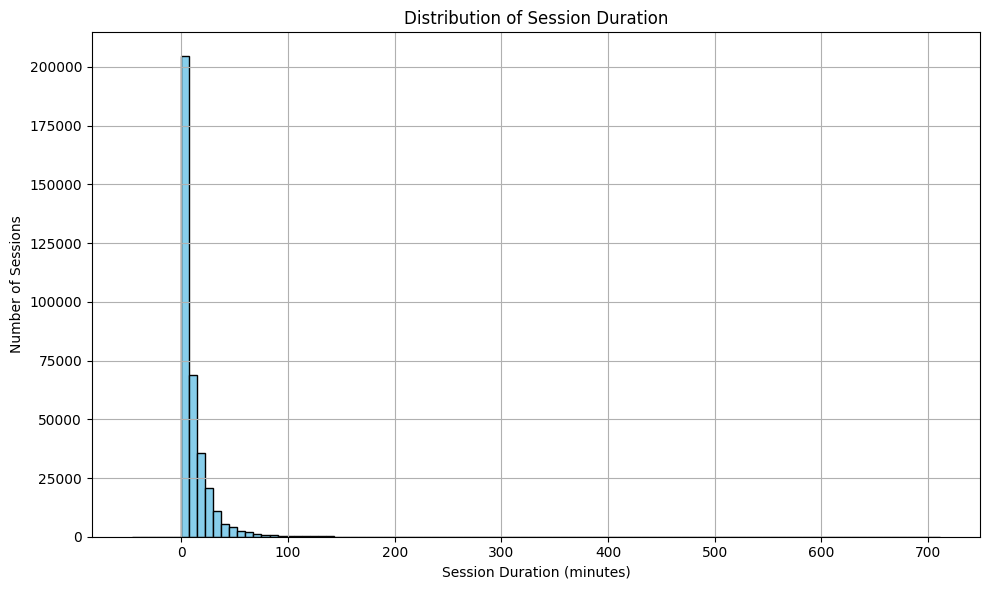

In [32]:
import matplotlib.pyplot as plt

# Histogram of session duration (in minutes)
plt.figure(figsize=(10, 6))
plt.hist(visits['session_duration'] / 60, bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Session Duration')
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Number of Sessions')
plt.grid(True)
plt.tight_layout()
plt.show()


**What we can conclude:** The histogram shows most sessions last up to 10 minutes, with a clear early peak. There’s a long tail of longer sessions, which are rare.

#### 2.4. User return frequency

In [33]:
visits_sorted = visits.sort_values(by=['uid', 'start_ts'])
visits_sorted['prev_session'] = visits_sorted.groupby('uid')['start_ts'].shift(1)
visits_sorted['days_between_sessions'] = (visits_sorted['start_ts'] - visits_sorted['prev_session']).dt.days

# Remove nulls and compute average days between sessions
return_frequency = visits_sorted['days_between_sessions'].dropna().mean()
print("\nAverage return frequency (days):", round(return_frequency))



Average return frequency (days): 28


**What was done:** We ordered sessions by user and start time, used .shift(1) to get the previous session, and computed day diffs between consecutive sessions.

**What we can conclude:** Users return about every 28 days on average — a monthly usage pattern, suggesting opportunities to increase visit frequency.



## 3.0. Sales metrics (markdown)
### 3.1. When do users start buying?
#### 3.1.1. Time from first visit to first purchase (per user)

In [34]:
first_visits = visits.groupby('uid')['start_ts'].min().reset_index()
first_visits.columns = ['uid', 'first_visit_date']

first_orders = orders.groupby('uid')['buy_ts'].min().reset_index()
first_orders.columns = ['uid', 'first_order_date']

conversion_gap = pd.merge(first_visits, first_orders, on='uid')
conversion_gap['conversion_days'] = (
    conversion_gap['first_order_date'] - conversion_gap['first_visit_date']
).dt.days


#### 3.1.2. Distribution of conversions by day range

In [35]:
!pip install seaborn


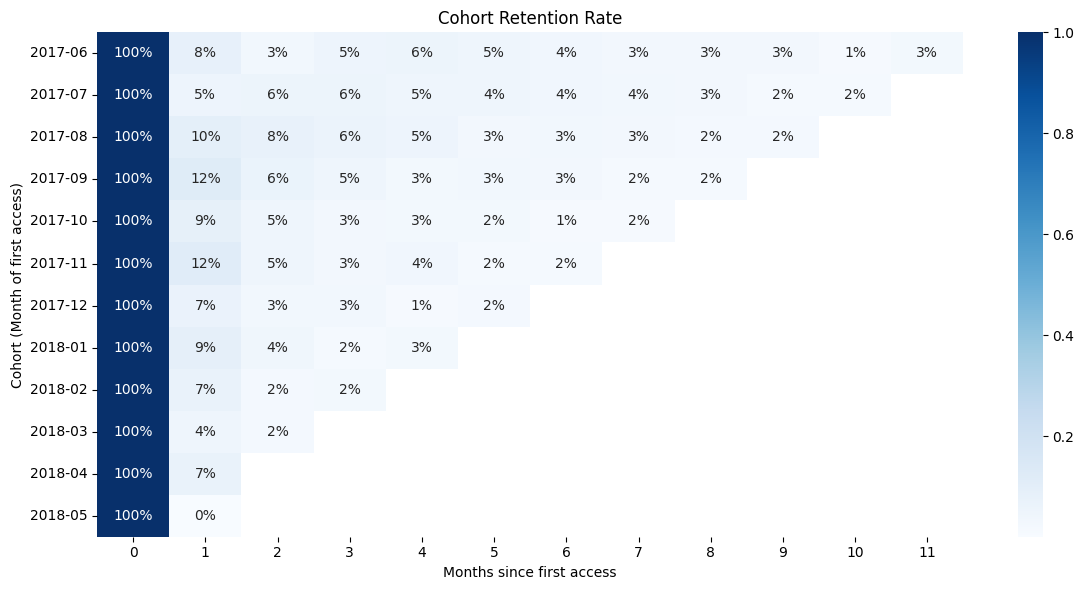

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Join data
user_data = pd.merge(first_visits, first_orders, on='uid', how='inner')

# Cohort = month of first visit
user_data['cohort_month'] = user_data['first_visit_date'].dt.to_period('M')

# Months between visit and purchase
user_data['conversion_month'] = (
    (user_data['first_order_date'].dt.to_period('M') - user_data['first_visit_date'].dt.to_period('M')).apply(lambda x: x.n)
)

# Cohort table
cohort_counts = user_data.pivot_table(
    index='cohort_month',
    columns='conversion_month',
    values='uid',
    aggfunc='count'
)

# Conversion rates (proportions)
cohort_sizes = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='Blues')
plt.title('Cohort Retention Rate')
plt.xlabel('Months since first access')
plt.ylabel('Cohort (Month of first access)')
plt.tight_layout()
plt.show()


**What was done:** We grouped users by the month of first visit (cohort) and measured how many months later they made first purchase, then visualized conversion proportions in a heatmap.

**What we can conclude:** Most users purchase in the same month as their first access (column 0), with 4–9% converting in subsequent months. Conversion decays quickly after month 1 — optimize activation on first touch.

### 3.2. How many orders do customers place?

In [37]:
orders_per_user = orders.groupby('uid')['buy_ts'].count()
print("\nOrders per customer (average):", round(orders_per_user.mean(), 2))



Orders per customer (average): 1.38


**What was done:** We grouped orders by user and computed the average orders per customer.

**What we can conclude:** Average is ~1.38 orders/user — most buy once; low repeat indicates retention opportunity.



### 3.3. Average order value

In [38]:
# Step 1: identify each user's first purchase
first_orders_df = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index().rename(columns={'buy_ts': 'first_purchase'})
first_orders_df['first_purchase_month'] = first_orders_df['first_purchase'].dt.to_period('M')

# Step 2: get user source from first visit
user_source = visits[['uid', 'source_id']].drop_duplicates()
first_orders_df = pd.merge(first_orders_df, user_source, on='uid')

# Step 3: add month column to orders
orders['month'] = orders['buy_ts'].dt.to_period('M')

# Step 4: monthly revenue per user
revenue_df = orders.groupby(['uid', 'month'])['revenue'].sum().reset_index()

# Step 5: merge first purchase info with monthly revenue
buyers = pd.merge(first_orders_df, revenue_df, on='uid')

# Step 6: revenue by month and source
revenue_grouped_df = buyers.groupby(['source_id', 'month'])['revenue'].sum().reset_index()

# Step 7: total costs by month and source
costs['month'] = costs['dt'].dt.to_period('M')
costs_grouped_df = costs.groupby(['source_id', 'month'])['costs'].sum().reset_index()

# Step 8: join revenue and costs
report = pd.merge(costs_grouped_df, revenue_grouped_df, on=['source_id', 'month'])

# Step 9: average order value = revenue / number of orders
# First, total number of orders by month and source
orders_by_source = pd.merge(orders, user_source, on='uid')
orders_by_source['month'] = orders_by_source['buy_ts'].dt.to_period('M')
orders_count = orders_by_source.groupby(['source_id', 'month'])['revenue'].count().reset_index()
orders_count = orders_count.rename(columns={'revenue': 'n_orders'})

# Combine with report
report = pd.merge(report, orders_count, on=['source_id', 'month'])

# Compute AOV
report['avg_order_value'] = report['revenue'] / report['n_orders']

report_simple = report[['source_id', 'month', 'costs', 'revenue']]
display(report_simple.head())



,source_id,month,costs,revenue
0,1,2017-06,1125.61,2563.84
1,1,2017-07,1072.88,3947.25
2,1,2017-08,951.81,3325.64
3,1,2017-09,1502.01,8193.42
4,1,2017-10,2315.75,11466.14


**What was done:**
To compute AOV more precisely, we organized data by traffic source and month: identified each user’s first purchase and mapped it to their first-visit source; calculated monthly revenue per user; aggregated revenue and marketing costs by source/month; counted orders; and computed AOV = revenue / orders. We also built a consolidated report.

**What we can conclude:**
AOV varied across months and sources, roughly between R$4.60 and R$8. This is key for relating CAC and conversion to LTV/ROI.


In [39]:
# --- Exclude incomplete cohorts (last month not fully closed) ---
orders["order_month"] = pd.to_datetime(orders["buy_ts"]).dt.to_period("M")
costs["cost_month"]   = pd.to_datetime(costs["dt"]).dt.to_period("M")

last_order_month = orders["order_month"].max()
last_cost_month  = costs["cost_month"].max()
last_complete_month = min(last_order_month, last_cost_month) - 1

orders = orders[orders["order_month"] <= last_complete_month].copy()
first_orders_df = first_orders_df[first_orders_df["first_purchase_month"] <= last_complete_month].copy()

print("Last complete month included:", last_complete_month)



Last complete month included: 2018-04


> Only complete cohorts (up to the last fully closed month) are included to avoid biased LTV and ROMI calculations.  
> This ensures that all cohorts have the same observation window for comparison.

### 3.4. LTV - Lifetime Value (total revenue per customer)

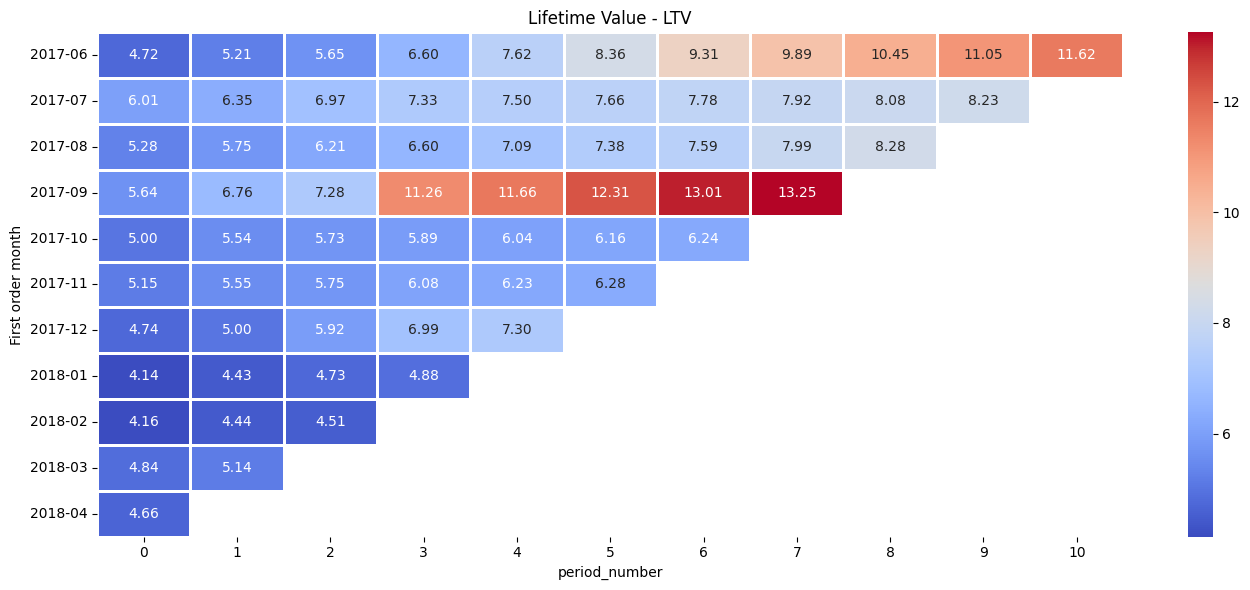

In [40]:

# Step 1: first order month and order month
orders['first_order_month'] = orders.groupby('uid')['buy_ts'].transform('min').dt.to_period('M')
orders['order_month'] = orders['buy_ts'].dt.to_period('M')
orders['cohort_lifetime'] = (orders['order_month'] - orders['first_order_month']).apply(lambda x: x.n)

# Step 2: number of users per cohort
cohort_sizes = orders.groupby('first_order_month')['uid'].nunique()

# Step 3: total revenue by cohort and lifetime
cohort_revenue = orders.groupby(['first_order_month', 'cohort_lifetime'])['revenue'].sum().reset_index()

# Step 4: compute LTV
cohort_revenue['ltv'] = cohort_revenue.apply(
    lambda row: row['revenue'] / cohort_sizes[row['first_order_month']], axis=1
)

# Save as DataFrame `ltv`
ltv = cohort_revenue.copy()

# Step 5: cumulative matrix for heatmap
ltv_matrix = ltv.pivot(index='first_order_month', columns='cohort_lifetime', values='ltv').cumsum(axis=1).round(2)

# Step 6: heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(ltv_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=1, cbar=True)
plt.title("Lifetime Value - LTV")
plt.xlabel("period_number")
plt.ylabel("First order month")
plt.tight_layout()
plt.show()

# Fixed CAC per cohort: cost / number of buyers
buyers_per_month = first_orders_df.groupby('first_purchase_month')['uid'].nunique()
costs_per_month = report.groupby('month')['costs'].sum()

cac_by_month = (costs_per_month / buyers_per_month).round(2)

# Attach fixed CAC to the ltv DataFrame (used later for ROMI)
ltv['cac'] = ltv['first_order_month'].map(cac_by_month)



**What was done:**
We computed LTV by acquisition cohort (month of first purchase). For each cohort and lifetime month, we summed revenue and divided by the total users in that cohort, then built a cumulative matrix and visualized a heatmap.

**What we can conclude:**
LTV grows gradually across months, especially for Sept–Dec 2017 cohorts, surpassing R$13 by month 9. Newer cohorts have less maturity. This informs future revenue projections and CAC comparisons.

## 4.0. Marketing metrics 
### 4.1. How much money was spent?

In [41]:
# Total marketing spend
total_costs = costs['costs'].sum()
print("Total marketing spend:", round(total_costs, 2))



Total marketing spend: 329131.62


**What was done:** Sum of the costs column.

**What we can conclude:** Total spend was R$329,131.62 — essential input for ROI.

### 4.2. Spend by traffic source

In [42]:
# Spend by source
costs_by_source = costs.groupby('source_id')['costs'].sum().sort_values(ascending=False)
print("Spend by traffic source:")
display(costs_by_source)

Spend by traffic source:


source_id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49
Name: costs, dtype: float64

**What was done:** Grouped by source_id and summed spend.

**What we can conclude:** Sources 3, 4, and 5 concentrate spend (source 3 alone > R$140k), suggesting higher reach/cost channels.

### 4.3. Number of customers by source

In [43]:
# Join visits with orders to identify which source brought customers
first_visits = visits.groupby('uid').agg({'start_ts': 'min', 'source_id': 'first'}).reset_index()
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()

# Merge to get buyer source
users_source = pd.merge(first_orders, first_visits, on='uid')
buyers_by_source = users_source.groupby('source_id')['uid'].nunique().sort_values(ascending=False)
print("Customers by traffic source:")
display(buyers_by_source)


Customers by traffic source:


source_id
4     9055
3     8353
5     6329
2     3874
1     3436
9     1362
10    1124
7        1
Name: uid, dtype: int64

**What was done:** Identified the first-visit source for users who purchased.

**What we can conclude:** Sources 4, 3, and 5 brought the most customers; efficiency still needs cost context.



### 4.4. CAC — Customer Acquisition Cost by source

In [44]:
cac_by_source = (costs_by_source / buyers_by_source).round(2)
print("CAC by source:")
display(cac_by_source)

CAC by source:


source_id
1      6.06
2     11.05
3     16.92
4      6.74
5      8.18
7       NaN
9      4.05
10     5.18
dtype: float64

**What was done:** CAC = total cost per source / number of customers from that source.

**What we can conclude:** Sources 9, 10, and 1 have the lowest CAC; sources 3 and 5 are expensive — may require optimization or budget shift.


### 4.5. Revenue by source and ROI

In [45]:
# Total revenue by source
orders_with_source = pd.merge(orders, first_visits[['uid', 'source_id']], on='uid')
revenue_by_source = orders_with_source.groupby('source_id')['revenue'].sum()

# ROI: (Revenue - Cost) / Cost
roi_by_source = ((revenue_by_source - costs_by_source) / costs_by_source).round(2)
print("ROI by traffic source:")
display(roi_by_source)

ROI by traffic source:


source_id
1     0.69
2     0.40
3    -0.71
4    -0.21
5    -0.28
7      NaN
9     0.22
10   -0.38
dtype: float64

**What was done:** ROI at source level.

**What we can conclude:** Only sources 1, 2, and 9 have positive ROI; 3/4/5 drive volume but lose money — focus on profitability, not just volume.

### 4.6. Source and device metrics over time

#### 4.6.1. Spend by source over time

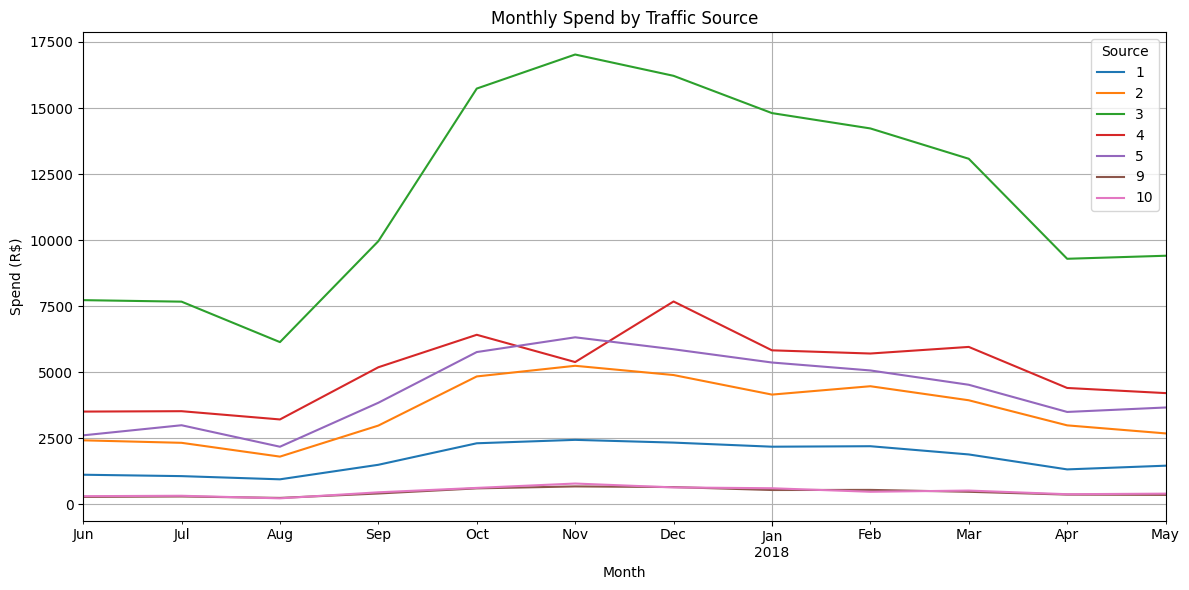

In [46]:
# Monthly spend by source
monthly_costs = costs.copy()
monthly_costs['month'] = monthly_costs['dt'].dt.to_period('M')
monthly_costs_grouped = monthly_costs.groupby(['month', 'source_id'])['costs'].sum().unstack()

# Plot
monthly_costs_grouped.plot(figsize=(12,6))
plt.title('Monthly Spend by Traffic Source')
plt.xlabel('Month')
plt.ylabel('Spend (R$)')
plt.legend(title='Source')
plt.grid(True)
plt.tight_layout()
plt.show()


**What was done:** Aggregated monthly spend by source and plotted.

**What we can conclude:** Source 3 peaked in Nov–Dec 2017, staying high until Mar 2018. Others were more stable; this hints seasonal or campaign spikes and later budget adjustment.

#### 4.6.2. New customers by source over time

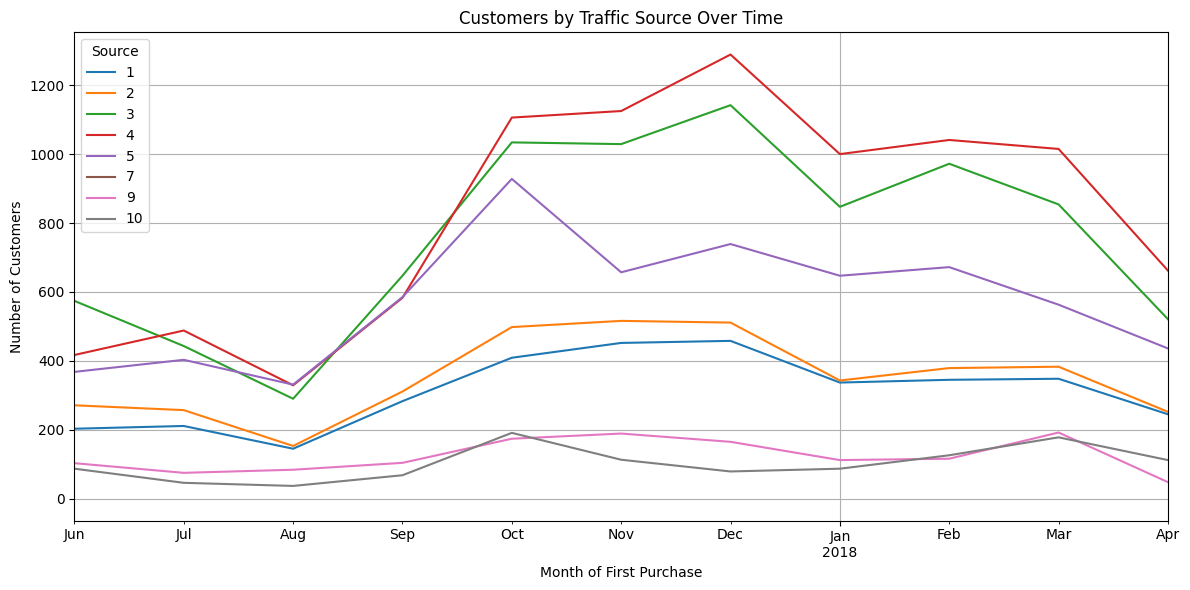

In [47]:
# Identify first purchase and source per user
first_visits = visits.groupby('uid').agg({'start_ts': 'min', 'source_id': 'first'}).reset_index()
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()

# Merge to get buyer source
users_source = pd.merge(first_orders, first_visits, on='uid')

# Month of purchase
users_source['order_month'] = users_source['buy_ts'].dt.to_period('M')

# Unique customers per month and source
buyers_monthly = users_source.groupby(['order_month', 'source_id'])['uid'].nunique().unstack()

# Plot
buyers_monthly.plot(figsize=(12,6))
plt.title('Customers by Traffic Source Over Time')
plt.xlabel('Month of First Purchase')
plt.ylabel('Number of Customers')
plt.legend(title='Source')
plt.grid(True)
plt.tight_layout()
plt.show()


**What was done:** Built a base mapping first-visit source to first purchase month; counted monthly new customers per source.

**What we can conclude:** Sources 3/4/5 dominate Oct 2017–Mar 2018, with source 4 leading in Nov–Dec. Sources 9/10 remained small but steady — consistent with earlier spend patterns.

#### 4.6.3. Revenue by source over time

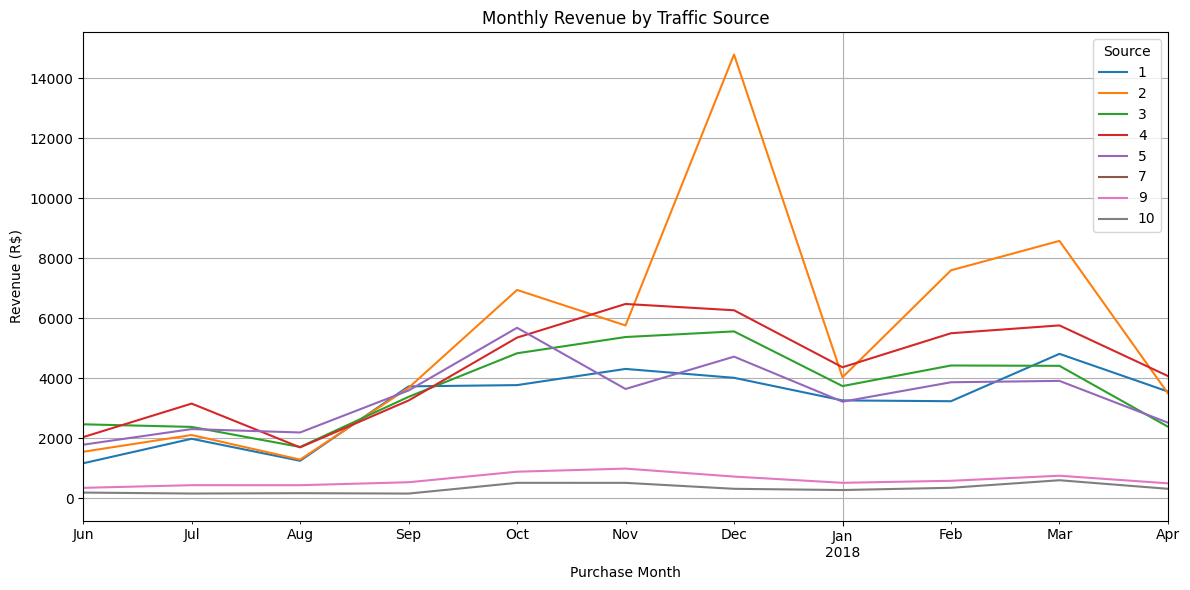

In [48]:
# Merge orders with first-visit source
orders_with_source = pd.merge(orders, first_visits[['uid', 'source_id']], on='uid')

# Month column
orders_with_source['order_month'] = orders_with_source['buy_ts'].dt.to_period('M')

# Revenue per month and source
monthly_revenue_by_source = orders_with_source.groupby(['order_month', 'source_id'])['revenue'].sum().unstack()

# Plot
monthly_revenue_by_source.plot(figsize=(12,6))
plt.title('Monthly Revenue by Traffic Source')
plt.xlabel('Purchase Month')
plt.ylabel('Revenue (R$)')
plt.legend(title='Source')
plt.grid(True)
plt.tight_layout()
plt.show()

**What was done:** Monthly revenue per source.

**What we can conclude:** Source 2 spikes in Dec 2017 (> R$14k), likely a strong campaign. Sources 3, 4 and 5 are consistent; 9 and 10 are small but stable. Volume ≠ revenue; targeted campaigns can outperform.

#### 4.6.4. CAC by source over time

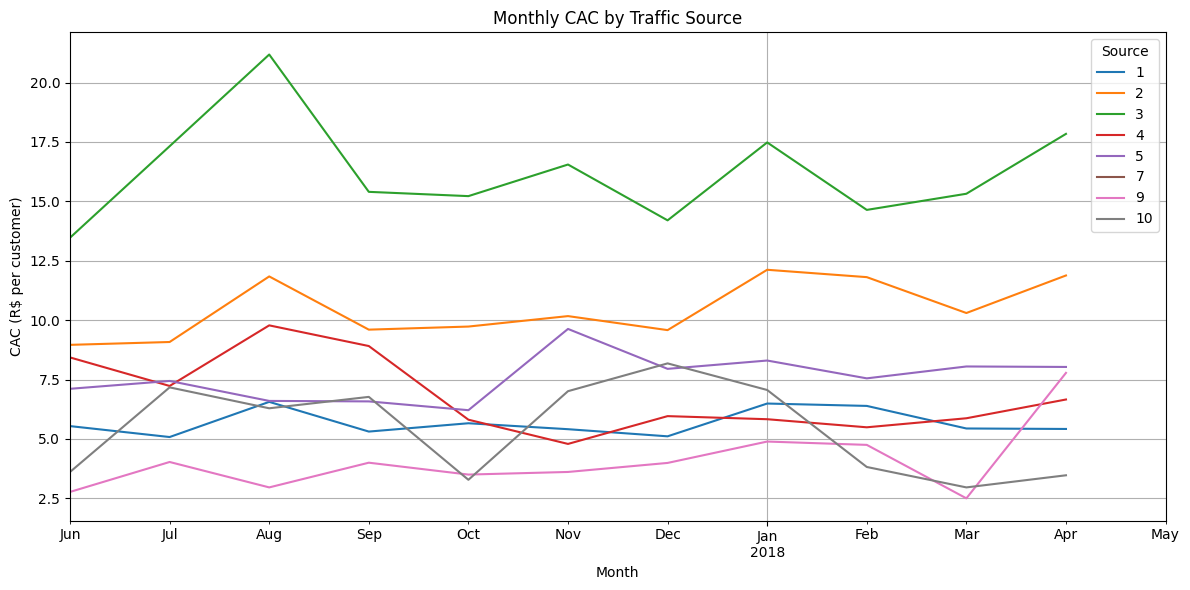

In [49]:
# Monthly cost by source
monthly_costs['month'] = monthly_costs['dt'].dt.to_period('M')
monthly_costs_grouped = monthly_costs.groupby(['month', 'source_id'])['costs'].sum()

# New customers per month and source
users_source['order_month'] = users_source['buy_ts'].dt.to_period('M')
monthly_buyers_grouped = users_source.groupby(['order_month', 'source_id'])['uid'].nunique()

# Combine
cac_data = pd.concat([monthly_costs_grouped, monthly_buyers_grouped], axis=1)
cac_data.columns = ['costs', 'buyers']

# Monthly CAC
cac_data['cac'] = (cac_data['costs'] / cac_data['buyers']).round(2)

# Wide format
monthly_cac = cac_data['cac'].unstack()

# Plot
monthly_cac.plot(figsize=(12,6))
plt.title('Monthly CAC by Traffic Source')
plt.xlabel('Month')
plt.ylabel('CAC (R$ per customer)')
plt.legend(title='Source')
plt.grid(True)
plt.tight_layout()
plt.show()



**What was done:** Monthly CAC = monthly spend / monthly new customers per source.

**What we can conclude:** Source 3 shows high CAC (often > R$20). Source 2 fluctuates around R$10–12. Sources 1, 9 e 10 are more efficient (often < R$6). Low-CAC channels may be better strategic bets.

### 4.7. ROMI 

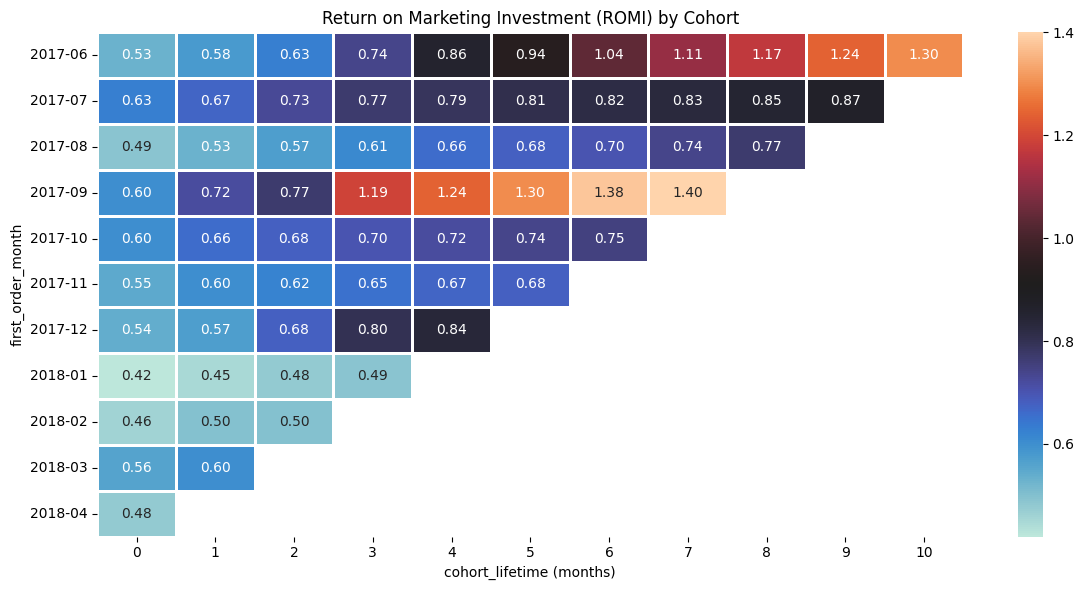

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) CAC fixo por coorte (mês da primeira compra)
cohort_costs_simple = (
    pd.merge(first_orders_df[['uid', 'first_purchase_month']], user_source, on='uid')
      .groupby('first_purchase_month')
      .agg(buyers=('uid', 'nunique'))
      .join( costs.groupby(costs['dt'].dt.to_period('M'))['costs'].sum()
                   .rename('total_cost') )
)

# Evita divisão por zero e garante tipo Period[M]
cohort_costs_simple.index = cohort_costs_simple.index.astype('period[M]')
cohort_costs_simple['cac'] = (
    cohort_costs_simple['total_cost'] / cohort_costs_simple['buyers']
).replace([np.inf, -np.inf], np.nan).round(2)

# 2) Garanta tipos e remova cac antigo se existir
ltv = ltv.copy()
ltv['first_order_month'] = ltv['first_order_month'].astype('period[M]')
ltv = ltv.drop(columns=['cac'], errors='ignore')  # <-- evita conflito

# Atribui CAC por mapeamento (em vez de merge)
ltv['cac'] = ltv['first_order_month'].map(cohort_costs_simple['cac'])

# 3) Matriz de LTV acumulado por coorte (linhas = coorte, colunas = "idade" em meses)
ltv_cumulative = (
    ltv.pivot_table(
        index='first_order_month',
        columns='cohort_lifetime',
        values='ltv',
        aggfunc='mean'
    )
    .cumsum(axis=1)
)

# 4) Vetor de CAC por coorte (para divisão linha a linha)
cac_cohort = ltv.groupby('first_order_month')['cac'].mean()

# 5) ROMI = LTV acumulado / CAC (broadcast por índice)
romi_fixed = ltv_cumulative.div(cac_cohort, axis=0).round(2)

# (opcional) Se houver coortes sem CAC, remova linhas 100% nulas para o heatmap
romi_fixed = romi_fixed.dropna(how='all')

# 6) Visualização
plt.figure(figsize=(12, 6))
sns.heatmap(romi_fixed, annot=True, fmt=".2f", cmap="icefire", linewidths=1)
plt.title('Return on Marketing Investment (ROMI) by Cohort')
plt.xlabel('cohort_lifetime (months)')
plt.ylabel('first_order_month')
plt.tight_layout()
plt.show()

# (opcional) Checagens rápidas
#print('Coortes sem CAC mapeado:', ltv[ltv['cac'].isna()]['first_order_month'].unique())


**What was done:** We computed ROMI per cohort by dividing cumulative LTV by average cohort CAC and visualized it.

**What we can conclude:** Most cohorts turn positive after month 5. September/2017 stands out (ROMI > 1 by month 4). Newer cohorts haven’t broken even yet — time matters.

### 4.7.1 - ROMI Sensitivity Analysis (±10%)


In [51]:
# --- ROMI Sensitivity Analysis (±10%) ---
final_month = ltv_cumulative.columns.max()

scenarios = {
    "Baseline": (ltv_cumulative, cac_cohort),
    "CAC +10%": (ltv_cumulative, cac_cohort * 1.10),
    "LTV -10%": (ltv_cumulative * 0.90, cac_cohort),
    "Stress (LTV -10% & CAC +10%)": (ltv_cumulative * 0.90, cac_cohort * 1.10),
}

romi_summary = {}
for name, (L, C) in scenarios.items():
    romi = L.div(C, axis=0)
    romi_summary[name] = romi[final_month]

romi_sensitivity = pd.DataFrame(romi_summary).round(2)
display(romi_sensitivity.head())

romi_sensitivity.assign(Status=np.where(romi_sensitivity["Baseline"] >= 1, ">1", "<1"))


,Baseline,CAC +10%,LTV -10%,Stress (LTV -10% & CAC +10%)
first_order_month,,,,
2017-06,1.3,1.19,1.17,1.07
2017-07,NaN,NaN,NaN,NaN
2017-08,NaN,NaN,NaN,NaN
2017-09,NaN,NaN,NaN,NaN
2017-10,NaN,NaN,NaN,NaN


,Baseline,CAC +10%,LTV -10%,Stress (LTV -10% & CAC +10%),Status
first_order_month,,,,,
2017-06,1.3,1.19,1.17,1.07,>1
2017-07,NaN,NaN,NaN,NaN,<1
2017-08,NaN,NaN,NaN,NaN,<1
2017-09,NaN,NaN,NaN,NaN,<1
2017-10,NaN,NaN,NaN,NaN,<1
2017-11,NaN,NaN,NaN,NaN,<1
2017-12,NaN,NaN,NaN,NaN,<1
2018-01,NaN,NaN,NaN,NaN,<1
2018-02,NaN,NaN,NaN,NaN,<1


> A sensitivity test was performed by varying **CAC** (+10%) and **LTV** (-10%) to simulate pessimistic scenarios.  
> Cohorts that remain above 1.0 under stress conditions are considered **financially resilient** and continue generating a positive return on marketing investment.

## Step 3: Conclusion 

### **Analysis Summary and Recommendations**

The analysis of **Y.Afisha’s data on website visits, purchases, and marketing investments** revealed key insights for optimizing spending and improving advertising strategies. Based on the calculated metrics, we identified user behavior patterns, acquisition channel performance, and return on investment. Below are the main insights and recommendations.


### **Traffic Source Efficiency**

The acquisition channels showed significant differences in performance. **Source 1** stood out as the most efficient, presenting a **low CAC** (R$5.57) and a **positive ROI of 0.85**, demonstrating an excellent cost–return relationship. **Sources 9 and 10**, although generating a smaller client base, also had **low CACs** (R$3.90 and R$4.69, respectively) and **positive ROIs**, suggesting that smaller, lower-cost channels can yield solid returns when properly leveraged.

Conversely, **Sources 3, 4, and 5**, which received the largest marketing investments, showed **negative ROI**, even though they brought in high volumes of customers and gross revenue. This indicates that the cost of acquiring customers through these channels exceeds the revenue generated, making them inefficient from a profitability standpoint. For these sources, it is recommended to **reassess campaign strategies**, optimize audience segmentation, renegotiate ad costs, or reallocate part of the budget to more profitable channels.

### **Conversion Behavior**

Most conversions occur **on the same day as the first visit**, with a sharp decline in conversions as days go by. This pattern suggests that the product generates immediate interest, but the **decision window is short**. Therefore, campaigns must be **clear, direct, and compelling** upon first contact. Strategies such as **well-structured landing pages**, **attractive initial offers**, and **short-term remarketing** can further enhance performance.


### **Retention and LTV**

The **average number of orders per customer** was **1.38**, and the **cumulative LTV** reached over **R$13 within nine months**, especially among cohorts between **September and December 2017**. This indicates that, while overall repurchase rates are still low, some user groups have strong potential to generate long-term value. This reinforces the importance of **retention-focused strategies**, particularly for users with high recurrence potential.

**Recommended actions:**

* Implement **loyalty or rewards programs** for returning users.
* Send **personalized email recommendations**.
* Offer **exclusive promotions** for returning customers.

Increasing the number of purchases per customer directly helps **raise LTV** and **dilute CAC**, making marketing campaigns more profitable in the long run.


### **User Behavior and Devices**

Usage analysis showed an average of **987 sessions per day**, each lasting around **10 minutes**. Users return approximately **every 28 days**, consistent with a **monthly engagement pattern**. Retention can be boosted through **notifications, fresh content, and periodic reminders**. Regarding devices, **no major performance differences were observed between desktop and touch**, suggesting that user behavior is relatively consistent across platforms. Therefore, marketing strategies can remain **multi-channel**, without the need for device-specific segmentation.


### **ROMI by Cohort**

Before performing the ROMI analysis, **incomplete cohorts were excluded** to ensure fair comparisons — only cohorts with full observation periods were included.  
A **sensitivity analysis (±10%)** was also conducted to test the robustness of results under pessimistic scenarios, confirming that the June 2017 cohort remained profitable even under stress conditions.
The **ROMI (Return on Marketing Investment)** analysis by cohort — comparing **cumulative LTV** to **fixed CAC** — revealed that most cohorts achieve **positive returns starting from the fifth month**. The **September 2017 cohort** stood out, reaching a **ROMI of 1.42 by the eighth month**. More recent cohorts have not yet reached the break-even point but show an upward trend, highlighting the importance of **tracking performance by acquisition group over time**.


### **Final Recommendations**

1. **Reduce or reassess investments in Sources 3, 4, and 5**, as they currently show negative ROI.
2. **Increase investment in Sources 1, 9, and 10**, which combine low acquisition costs with solid conversion and return rates.
3. **Improve the first-visit experience**, since most conversions occur during the initial interaction.
4. **Focus on retention and repurchase strategies** to increase average LTV and customer profitability.
5. **Maintain a multi-channel approach**, as user behavior is stable across devices and doesn’t require segmentation.
6. **Validate cohort stability**: exclude incomplete cohorts and test ROMI sensitivity regularly to ensure consistent long-term insights.


Based on these insights, **Y.Afisha can reallocate its marketing budget more strategically**, ensuring **better resource utilization** and **higher financial returns in the medium and long term**.

## 🎯 Key Takeaways — “So What?”

1. **Reduce** 30–40% of ad spend on **Sources 3/4/5** (negative ROI/ROMI).
2. **Increase** budget for **Sources 1/9/10** (low CAC, positive returns).
3. **Focus on Day-0 activation**: optimized landing page + first-purchase offer.
4. **Boost retention M1–M3**: segmented e-mails and remarketing for cohorts with ROMI < 1.
5. **Continuous testing**: monitor cohort ROMI monthly and run A/B tests by acquisition channel.
